In [1]:
from ultralytics import YOLO

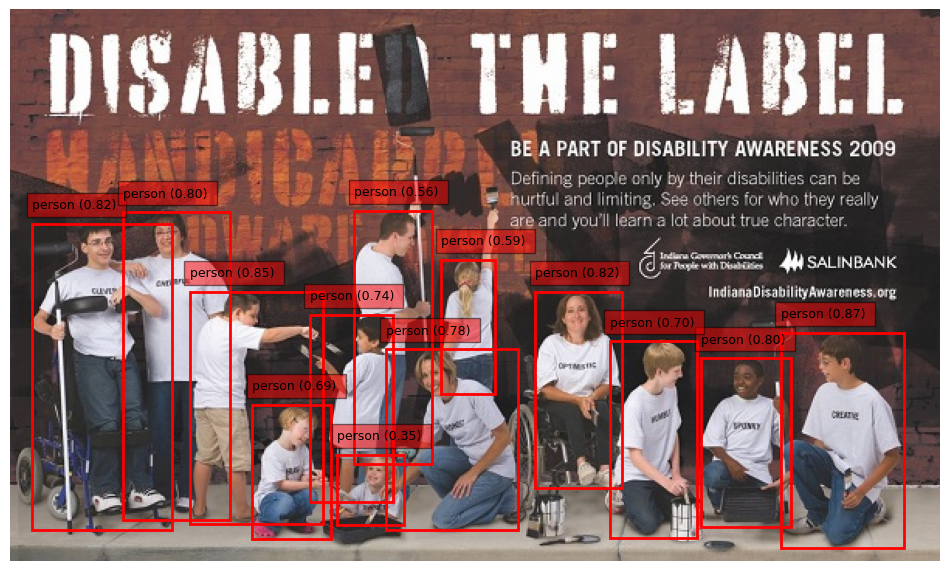

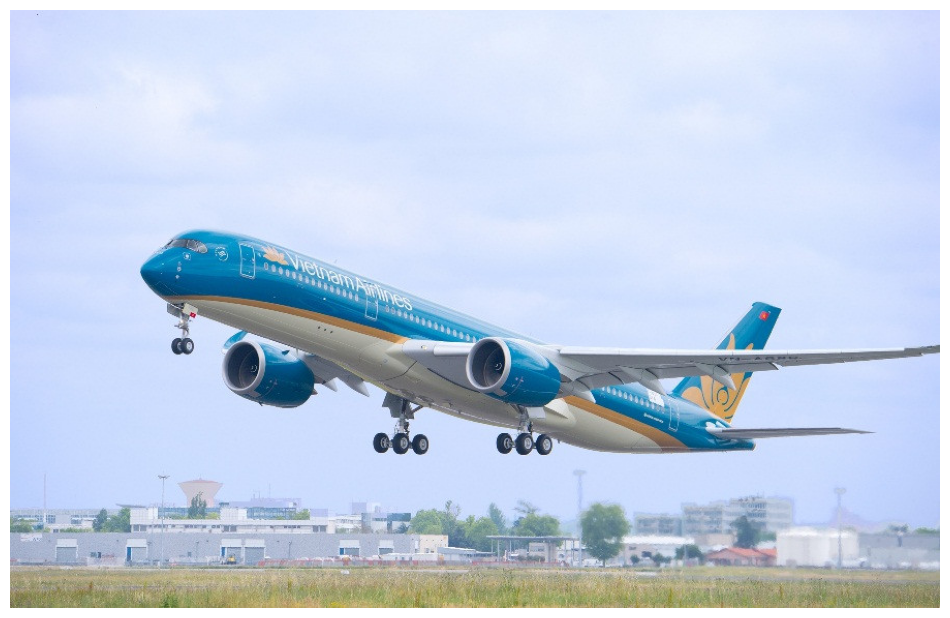

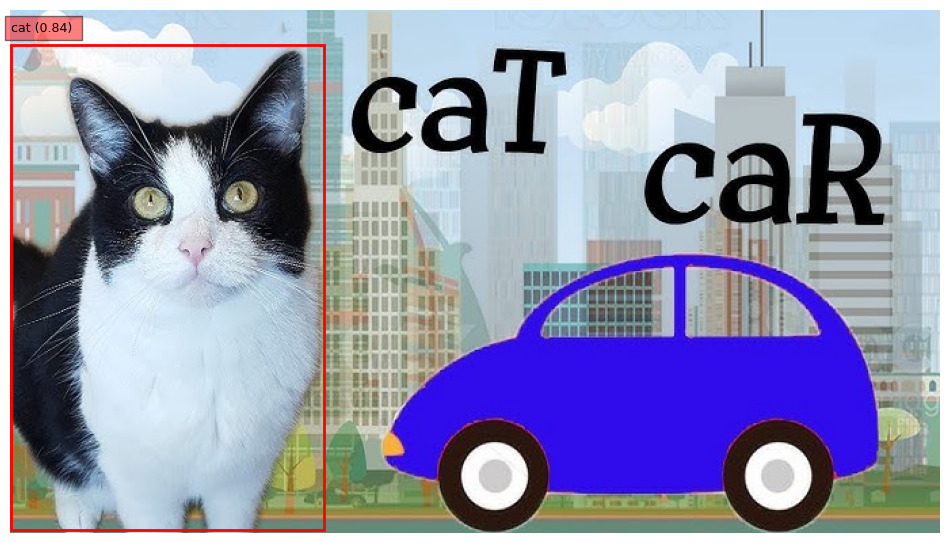

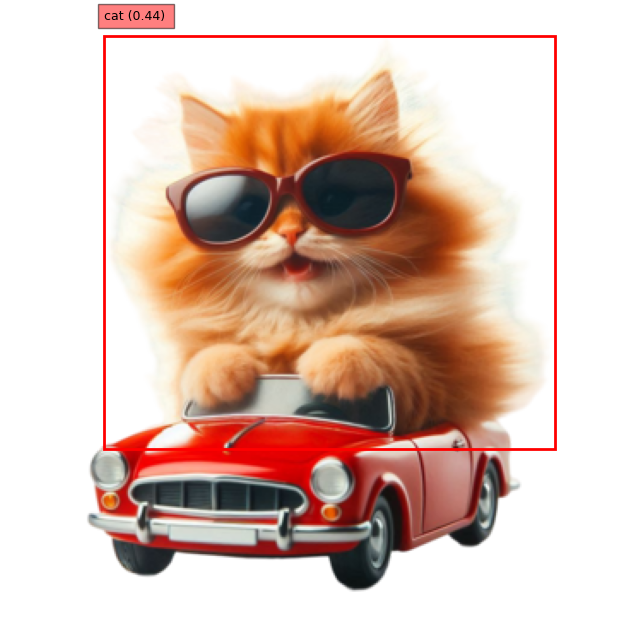

In [7]:
import torch
import os
text_det_model_path = 'models/best.pt'
yolo = YOLO(text_det_model_path)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def text_detection(img_path, text_det_model):
  
  text_det_results = text_det_model(img_path, verbose=False)[0]

  bboxes = text_det_results.boxes.xyxy.tolist()
  classes = text_det_results.boxes.cls.tolist()
  names = text_det_results.names
  confs = text_det_results.boxes.conf.tolist()

  return bboxes, classes, names, confs

import matplotlib.pyplot as plt

def visualize_detections(img, detections):
  

  plt.figure(figsize=(12, 8))
  plt.imshow(img)
  plt.axis('off')

  for bbox, detected_class, confidence in detections:
    x1, y1, x2, y2 = bbox
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2))
    plt.text(x1, y1 - 10, f"{detected_class} ({confidence:.2f}) ", fontsize=9, bbox=dict(facecolor='red', alpha=0.5))

  plt.show()

from PIL import Image

def predict(img_path, text_det_model, device):
  

  bboxes, classes, names, confs = text_detection(img_path, text_det_model)


  img = Image.open(img_path)

  predictions = []


  for bbox, cls, conf in zip(bboxes, classes, confs):
    x1, y1, x2, y2 = bbox
    confidence = conf
    detected_class = cls
    name = names[int(cls)]
    
    predictions.append((bbox, name, confidence))


  visualize_detections(img, predictions)

  return predictions

img_dir = 'ImagesTest/'

for img_filename in os.listdir(img_dir):
    img_path = os.path.join(img_dir, img_filename)
    predictions = predict(
        img_path,
        text_det_model=yolo,
        device=device
    )